In [149]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [150]:
df1=pd.read_excel('Data_Train.xlsx',parse_dates=['Date_of_Journey'])
df1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [151]:
df=df1.copy()

In [152]:
df.shape

(10683, 11)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [154]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Missing values removal

In [155]:
missing_sum=df.isnull().sum()
missing_sum

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [156]:
(missing_sum.sum()/df.shape[0])*100

0.018721332958906673

Percentage of missing values is less than 5%. So we can remove them.

In [157]:
df.dropna(inplace=True)

Checking whether there are any duplicate values

In [158]:
df[df.duplicated()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
683,Jet Airways,2019-01-06,Delhi,Cochin,DEL → NAG → BOM → COK,14:35,04:25 02 Jun,13h 50m,2 stops,No info,13376
1061,Air India,2019-05-21,Delhi,Cochin,DEL → GOI → BOM → COK,22:00,19:15 22 May,21h 15m,2 stops,No info,10231
1348,Air India,2019-05-18,Delhi,Cochin,DEL → HYD → BOM → COK,17:15,19:15 19 May,26h,2 stops,No info,12392
1418,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,05:30,04:25 07 Jun,22h 55m,2 stops,In-flight meal not included,10368
1674,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,18:25,21:20,2h 55m,non-stop,No info,7303
...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,12:35 28 Jun,13h 30m,2 stops,No info,12819
10616,Jet Airways,2019-01-06,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 02 Jun,26h 55m,2 stops,No info,13014
10634,Jet Airways,2019-06-06,Delhi,Cochin,DEL → JAI → BOM → COK,09:40,12:35 07 Jun,26h 55m,2 stops,In-flight meal not included,11733
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150


These are same flights on different dates, we can drop them, but many a times flight fare varies from weekdays to weekends or on different days of a week, therefore, its better to keep them.

In [159]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])
    df[col]=pd.to_datetime(df[col])

In [160]:
for i in ['Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [161]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1001.4+ KB


In [162]:
df.sample(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2501,IndiGo,2019-03-15,Chennai,Kolkata,MAA → CCU,2022-06-06 19:35:00,2022-06-06 21:55:00,2h 20m,non-stop,No info,6297
1804,Air India,2019-06-03,Delhi,Cochin,DEL → AMD → BOM → COK,2022-06-06 05:00:00,2022-03-07 19:15:00,38h 15m,2 stops,No info,10283


# Feature Engineering

In [163]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month
df['journey_year']=df['Date_of_Journey'].dt.year

In [164]:
df['day_of_week']=df['Date_of_Journey'].dt.day_name()

In [165]:
df.drop('Date_of_Journey', axis=1, inplace=True)
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week
0,IndiGo,Banglore,New Delhi,BLR → DEL,2022-06-06 22:20:00,2022-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3,2019,Sunday
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2022-06-06 05:50:00,2022-06-06 13:15:00,7h 25m,2 stops,No info,7662,5,1,2019,Saturday


In [166]:
df['dep_time_hr']=df['Dep_Time'].dt.hour
df['dep_time_min']=df['Dep_Time'].dt.minute

In [167]:
df['arr_time_hr']=df['Arrival_Time'].dt.hour
df['arr_time_min']=df['Arrival_Time'].dt.minute

In [168]:
df.drop('Dep_Time',axis=1,inplace=True)

In [169]:
df.drop('Arrival_Time',axis=1,inplace=True)

In [170]:
df.sample(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min
6509,GoAir,Banglore,New Delhi,BLR → GOI → DEL,4h 25m,1 stop,No info,7657,3,9,2019,Tuesday,15,50,20,15
3721,Vistara,Kolkata,Banglore,CCU → DEL → BLR,26h,1 stop,No info,11682,24,3,2019,Sunday,7,10,9,10


In [171]:
df[['dur_hr', 'dur_min']] = df['Duration'].str.split(' ', 1,expand=True)

In [172]:
df.drop('Duration',axis=1,inplace=True)

In [173]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,Sunday,22,20,1,10,2h,50m
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,Saturday,5,50,13,15,7h,25m
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,Friday,9,25,4,25,19h,None
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,2019,Thursday,18,5,23,30,5h,25m
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,2019,Thursday,16,50,21,35,4h,45m


In [174]:
for i in range(df.shape[0]):
    df['dur_hr'].iloc[i]=df['dur_hr'].iloc[i][:-1]
    

In [175]:
df['dur_min'].fillna(0,inplace=True)
        

In [176]:
for i in range(df.shape[0]):
    if(df['dur_min'].iloc[i]!=0):
        df['dur_min'].iloc[i]=df['dur_min'].iloc[i][:-1]
    else:
        df['dur_min'].iloc[i]=0

In [177]:
df.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,journey_year,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,2019,Saturday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,2019,Friday,9,25,4,25,19,0


In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Source           10682 non-null  object
 2   Destination      10682 non-null  object
 3   Route            10682 non-null  object
 4   Total_Stops      10682 non-null  object
 5   Additional_Info  10682 non-null  object
 6   Price            10682 non-null  int64 
 7   journey_day      10682 non-null  int64 
 8   journey_month    10682 non-null  int64 
 9   journey_year     10682 non-null  int64 
 10  day_of_week      10682 non-null  object
 11  dep_time_hr      10682 non-null  int64 
 12  dep_time_min     10682 non-null  int64 
 13  arr_time_hr      10682 non-null  int64 
 14  arr_time_min     10682 non-null  int64 
 15  dur_hr           10682 non-null  object
 16  dur_min          10682 non-null  object
dtypes: int64(8), object(9)
memory u

In [179]:
df['dur_hr']=df['dur_hr'].astype('int64')
df['dur_min']=df['dur_min'].astype('int64')

In [180]:
df.drop('journey_day',axis=1,inplace=True)

In [181]:
df.drop('journey_year',axis=1,inplace=True)

# EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x1e940c75d90>,
 'caps': [<matplotlib.lines.Line2D at 0x1e941117490>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e940c75a30>],
 'medians': [<matplotlib.lines.Line2D at 0x1e941117b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e941117eb0>],
 'means': []}

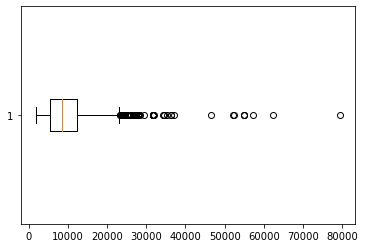

In [182]:
plt.boxplot(df['Price'],vert=False)

The distribution of Price is positively skewed with many outliers.

In [183]:
df.Price.describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [213]:
df.corr()

,Price,journey_month,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
Price,1.000000,0.010705,0.006799,-0.024458,0.024244,-0.086155,0.508902,-0.124899
journey_month,0.010705,1.000000,0.028189,0.002136,-0.004329,-0.025786,0.055564,-0.018601
dep_time_hr,0.006799,0.028189,1.000000,-0.024745,0.005180,0.067911,0.002903,-0.023723
dep_time_min,-0.024458,0.002136,-0.024745,1.000000,0.043122,-0.017597,-0.022030,0.092443
arr_time_hr,0.024244,-0.004329,0.005180,0.043122,1.000000,-0.154363,0.055300,-0.118315
arr_time_min,-0.086155,-0.025786,0.067911,-0.017597,-0.154363,1.000000,-0.074352,0.151571
dur_hr,0.508902,0.055564,0.002903,-0.022030,0.055300,-0.074352,1.000000,-0.126528
dur_min,-0.124899,-0.018601,-0.023723,0.092443,-0.118315,0.151571,-0.126528,1.000000


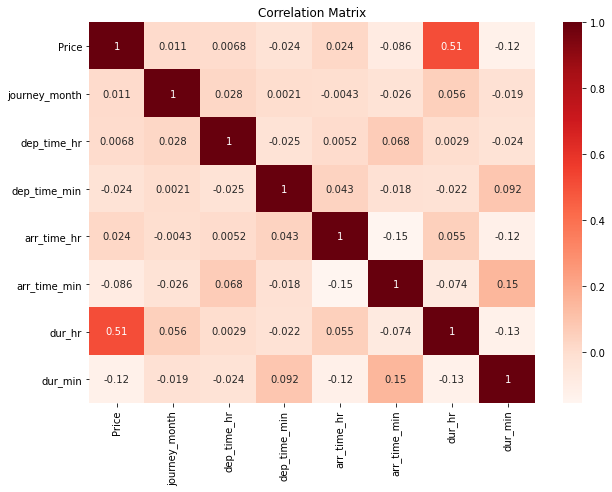

In [214]:
fig, ax = plt.subplots(figsize=(10,7)) 
sns.heatmap(df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

<AxesSubplot:xlabel='journey_month'>

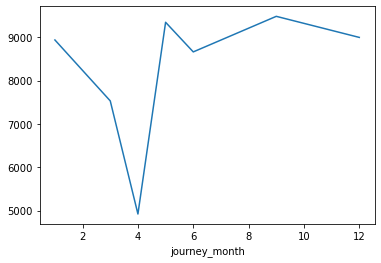

In [184]:
df.groupby('journey_month')['Price'].median().plot()

<AxesSubplot:xlabel='day_of_week'>

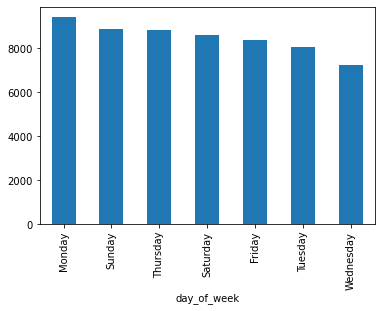

In [185]:
df.groupby('day_of_week')['Price'].median().sort_values(ascending=False).plot(kind='bar')

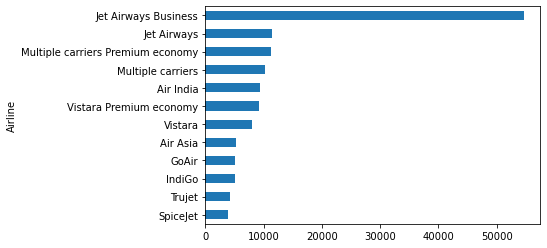

In [186]:
t=df.groupby('Airline')['Price'].median().sort_values().plot(kind='barh')

<AxesSubplot:xlabel='Destination', ylabel='Price'>

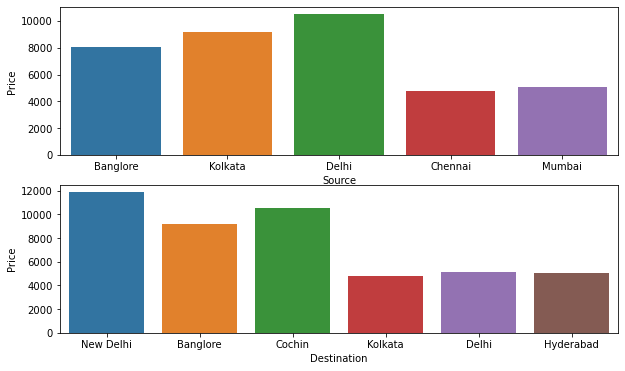

In [187]:
f,ax=plt.subplots(2,figsize=(10,6))
sns.barplot(data=df, x='Source', y='Price',ci=False,ax=ax[0])
sns.barplot(data=df, x='Destination', y='Price',ci=False,ax=ax[1])

<AxesSubplot:xlabel='Airline', ylabel='Price'>

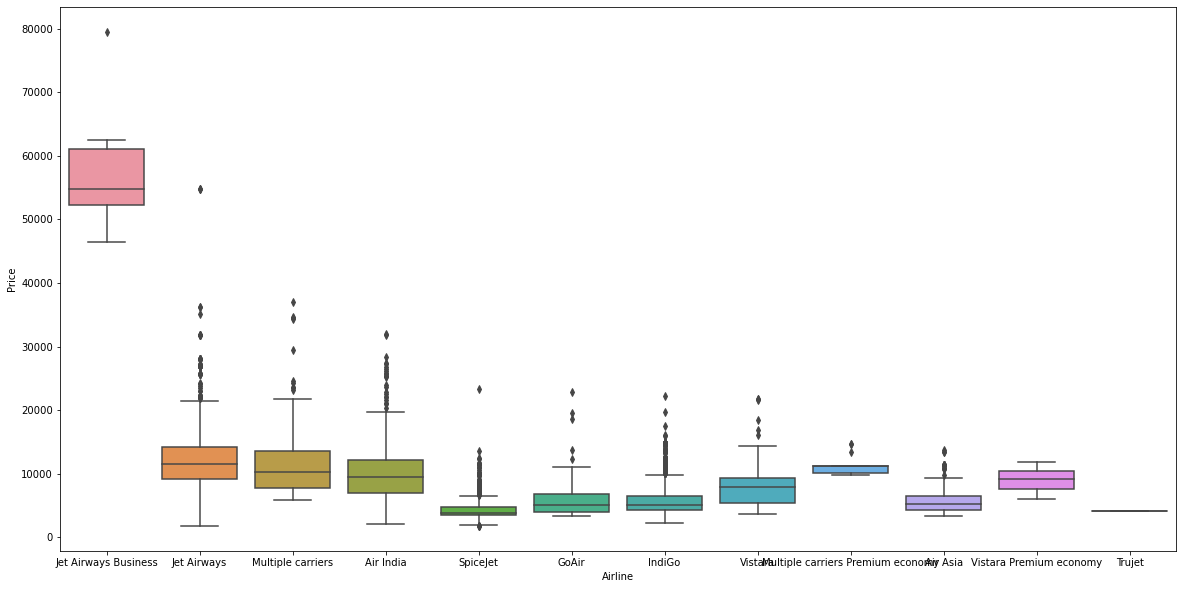

In [188]:
plt.figure(figsize=(20,10))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

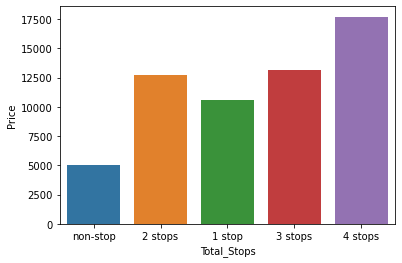

In [189]:
sns.barplot(x='Total_Stops',y='Price',data=df,ci=False)

<AxesSubplot:xlabel='dep_time_hr'>

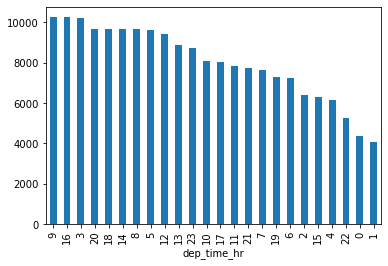

In [190]:
df.groupby('dep_time_hr')['Price'].median().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='dur_hr'>

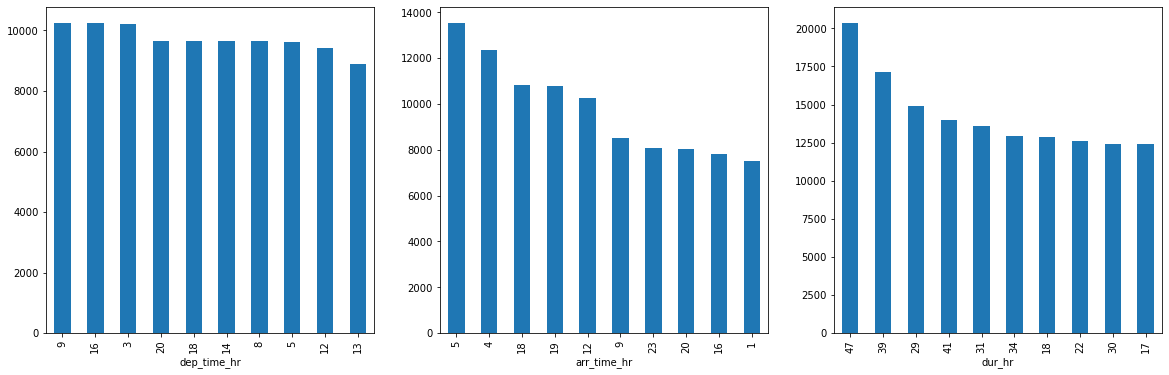

In [191]:
f,ax=plt.subplots(1,3,figsize=(20,6))
df.groupby('dep_time_hr')['Price'].median().sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[0])
df.groupby('arr_time_hr')['Price'].median().sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[1])
df.groupby('dur_hr')['Price'].median().sort_values(ascending=False)[:10].plot(kind='bar',ax=ax[2])

<AxesSubplot:ylabel='Additional_Info'>

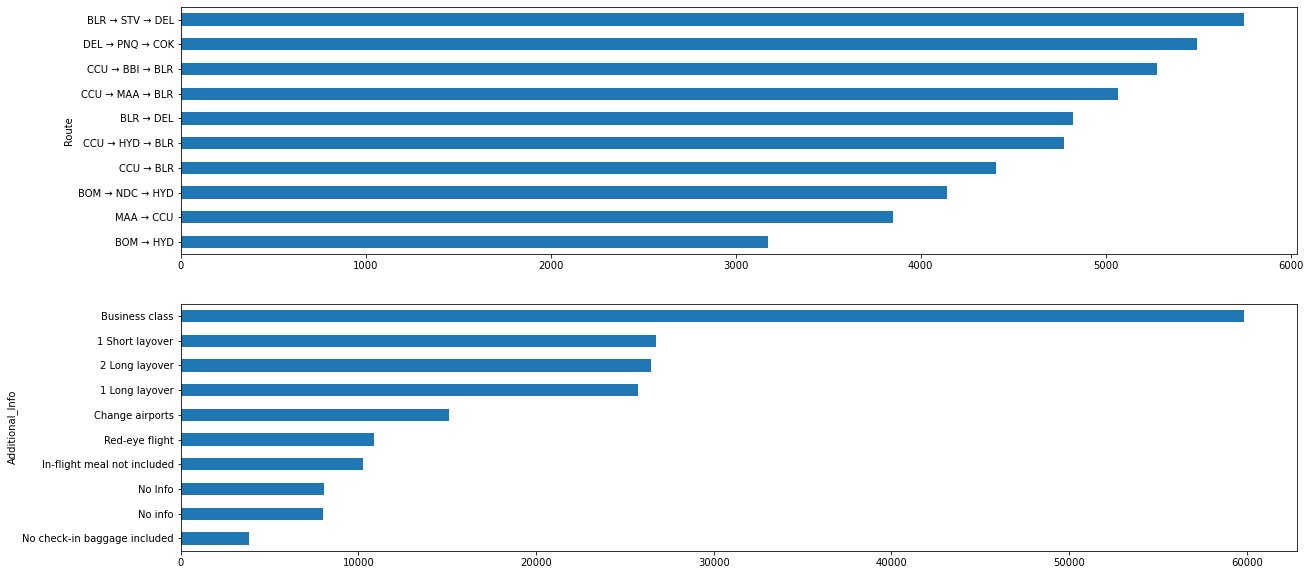

In [192]:
f,ax=plt.subplots(2,1,figsize=(20,10))
df.groupby('Route')['Price'].median().sort_values()[:10].plot(kind='barh',ax=ax[0])
df.groupby('Additional_Info')['Price'].median().sort_values().plot(kind='barh',ax=ax[1])


# Modelling 

In [193]:
X= df.drop(columns=['Price']) # Input columns
y= df['Price'] # Target coulumn

In [194]:
X.head(3)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_month,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,1,Saturday,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,9,Friday,9,25,4,25,19,0


In [195]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols

['journey_month',
 'dep_time_hr',
 'dep_time_min',
 'arr_time_hr',
 'arr_time_min',
 'dur_hr',
 'dur_min']

In [196]:
categorical_cols = X.select_dtypes('object').columns.tolist()
categorical_cols

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'day_of_week']

In [197]:
df2=df.copy()

In [198]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df2[numeric_cols])

MinMaxScaler()

In [199]:
df2.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_month,day_of_week,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,3,Sunday,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,Saturday,5,50,13,15,7,25


In [200]:
X[numeric_cols] = scaler.transform(X[numeric_cols])
X[numeric_cols].describe()

,journey_month,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,0.412248,0.543088,0.443805,0.580399,0.448920,0.200986,0.515021
std,0.271602,0.249949,0.341233,0.298231,0.300124,0.184663,0.308119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.347826,0.090909,0.347826,0.181818,0.021739,0.272727
50%,0.363636,0.478261,0.454545,0.608696,0.454545,0.152174,0.545455
75%,0.454545,0.782609,0.727273,0.826087,0.636364,0.304348,0.818182
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [201]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoder.fit(df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [202]:
encoder.categories_

[array(['Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
        'Jet Airways Business', 'Multiple carriers',
        'Multiple carriers Premium economy', 'SpiceJet', 'Trujet',
        'Vistara', 'Vistara Premium economy'], dtype=object),
 array(['Banglore', 'Chennai', 'Delhi', 'Kolkata', 'Mumbai'], dtype=object),
 array(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'],
       dtype=object),
 array(['BLR → AMD → DEL', 'BLR → BBI → DEL', 'BLR → BDQ → DEL',
        'BLR → BOM → AMD → DEL', 'BLR → BOM → BHO → DEL',
        'BLR → BOM → DEL', 'BLR → BOM → IDR → DEL',
        'BLR → BOM → IDR → GWL → DEL', 'BLR → BOM → IXC → DEL',
        'BLR → BOM → JDH → DEL', 'BLR → BOM → NAG → DEL',
        'BLR → BOM → UDR → DEL', 'BLR → CCU → BBI → DEL',
        'BLR → CCU → BBI → HYD → DEL', 'BLR → CCU → BBI → HYD → VGA → DEL',
        'BLR → CCU → DEL', 'BLR → CCU → GAU → DEL', 'BLR → COK → DEL',
        'BLR → DEL', 'BLR → GAU → DEL', 'BLR → GOI → DEL',
        'BLR →

In [203]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))
print(encoded_cols)

['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business', 'Airline_Multiple carriers', 'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet', 'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy', 'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_BLR → AMD → DEL', 'Route_BLR → BBI → DEL', 'Route_BLR → BDQ → DEL', 'Route_BLR → BOM → AMD → DEL', 'Route_BLR → BOM → BHO → DEL', 'Route_BLR → BOM → DEL', 'Route_BLR → BOM → IDR → DEL', 'Route_BLR → BOM → IDR → GWL → DEL', 'Route_BLR → BOM → IXC → DEL', 'Route_BLR → BOM → JDH → DEL', 'Route_BLR → BOM → NAG → DEL', 'Route_BLR → BOM → UDR → DEL', 'Route_BLR → CCU → BBI → DEL', 'Route_BLR → CCU → BBI → HYD → DEL', 'Route_BLR → CCU → BBI → HYD → VGA → DEL', 'Route_BL

In [204]:
X[encoded_cols] = encoder.transform(X[categorical_cols])

In [205]:
X.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journey_month,day_of_week,dep_time_hr,dep_time_min,...,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,0.181818,Sunday,0.956522,0.363636,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,0.000000,Saturday,0.217391,0.909091,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [206]:
categorical_cols

['Airline',
 'Source',
 'Destination',
 'Route',
 'Total_Stops',
 'Additional_Info',
 'day_of_week']

In [207]:
X.drop(X[categorical_cols],axis=1,inplace=True)

In [208]:
X.head(2)

,journey_month,dep_time_hr,dep_time_min,arr_time_hr,arr_time_min,dur_hr,dur_min,Airline_Air Asia,Airline_Air India,Airline_GoAir,...,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,0.181818,0.956522,0.363636,0.043478,0.181818,0.021739,0.909091,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.000000,0.217391,0.909091,0.565217,0.272727,0.130435,0.454545,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [209]:
y.head(4)

0     3897
1     7662
2    13882
3     6218
Name: Price, dtype: int64

In [210]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)

In [211]:
X_train.isnull().sum()

journey_month            0
dep_time_hr              0
dep_time_min             0
arr_time_hr              0
arr_time_min             0
                        ..
day_of_week_Saturday     0
day_of_week_Sunday       0
day_of_week_Thursday     0
day_of_week_Tuesday      0
day_of_week_Wednesday    0
Length: 180, dtype: int64

In [226]:
from sklearn.linear_model import  Ridge, Lasso, LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor, BaggingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB

In [216]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

# call a function named 'ml_model' which will call all Regressor model
def predict(ml_model):

    # Define Models Name
    print('Model: {}'.format(ml_model))

    # fit all models with data
    model= ml_model.fit(X_train,y_train)

    # Model Training Score
    print("Training score: {}".format(model.score(X_train,y_train)))

    # Model Predictions
    predictions = model.predict(X_test)

    # Define r2 score for Regressor Model
    r2score=r2_score(y_test,predictions) 
    print("r2 score: {}".format(r2score))
          
    # Model Evoluation with MAE, MSE, RMSE
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)

Model: Ridge()
Training score: 0.7422060765713017
r2 score: 0.7448595762248689
MAE:1529.6261641378337
MSE:5501352.188009885
RMSE:2345.4961496472097


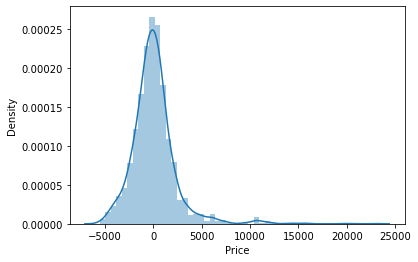

In [217]:
predict(Ridge())

Model: Lasso()
Training score: 0.7382882569856086
r2 score: 0.7413682656905077
MAE:1547.9985224668092
MSE:5576632.022396918
RMSE:2361.489365294055


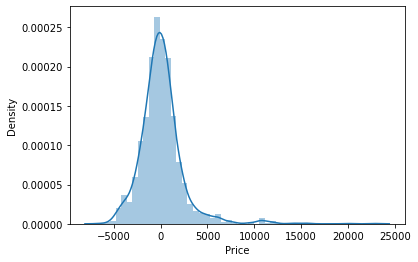

In [218]:
predict(Lasso())

Model: LinearRegression()
Training score: 0.7439995480825345
r2 score: -1.0527662278583391e+18
MAE:173493358712.6296
MSE:2.2699804701256845e+25
RMSE:4764431204378.635


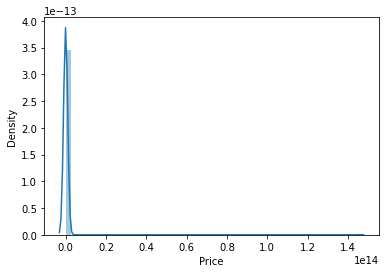

In [219]:
predict(LinearRegression())

Model: KNeighborsRegressor()
Training score: 0.8574576012827632
r2 score: 0.8294422973858728
MAE:1114.2033692091716
MSE:3677574.7902854467
RMSE:1917.7003911678817


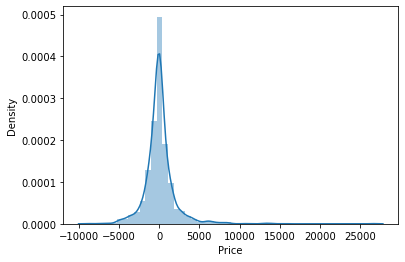

In [220]:
predict(KNeighborsRegressor())

Model: DecisionTreeRegressor()
Training score: 0.9909094554279877
r2 score: 0.8027803278425596
MAE:853.4732101076276
MSE:4252461.679291451
RMSE:2062.1497713045605


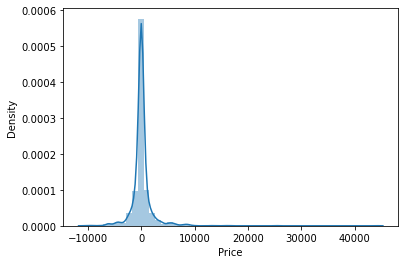

In [221]:
predict(DecisionTreeRegressor())

Model: RandomForestRegressor()
Training score: 0.9732037369251193
r2 score: 0.8439132290537213
MAE:793.1965194698844
MSE:3365551.7466001995
RMSE:1834.5440159887687


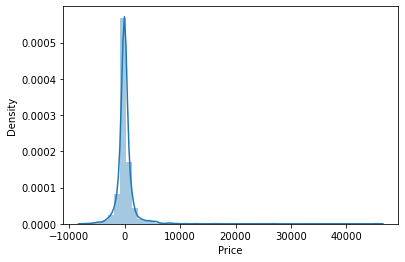

In [222]:
predict(RandomForestRegressor())

Model: GradientBoostingRegressor()
Training score: 0.7979218333740661
r2 score: 0.8047964662192326
MAE:1379.0659367458936
MSE:4208989.590056323
RMSE:2051.5822162556206


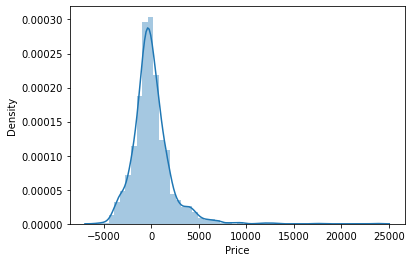

In [223]:
predict(GradientBoostingRegressor())

Model: XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None,
             enable_categorical=False, gamma=None, gpu_id=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=None)
Training score: 0.9315765699194215
r2 score: 0.8839334857669712
MAE:931.3115777607884
MSE:2502632.717241692
RMSE:1581.9711493076263


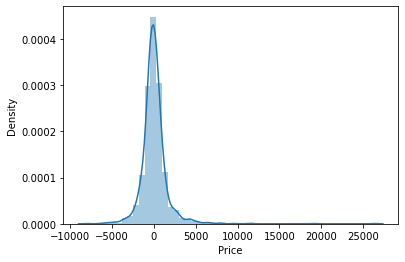

In [224]:
predict(XGBRegressor())

Model: GaussianNB()
Training score: 0.5089526038619075
r2 score: 0.6593067962430559
MAE:1377.3720168460459
MSE:7346046.048666354
RMSE:2710.3590257872397


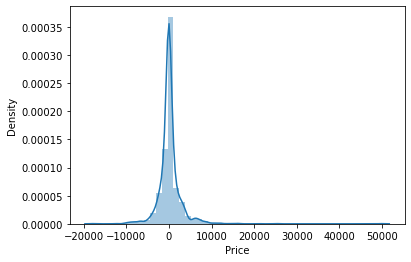

In [225]:
predict(GaussianNB())

Model: AdaBoostRegressor()
Training score: 0.08876644889137497
r2 score: 0.10478025687806403
MAE:3707.4287705394513
MSE:19302778.52369683
RMSE:4393.492747654971


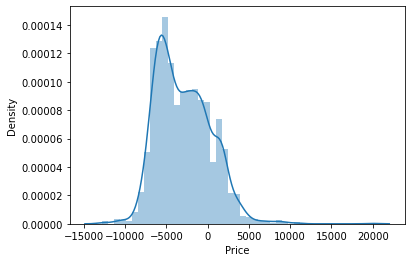

In [227]:
predict(AdaBoostRegressor())

Model: BaggingRegressor()
Training score: 0.9679141667774986
r2 score: 0.8279709568729329
MAE:841.4296449740401
MSE:3709299.9172974788
RMSE:1925.954287437134


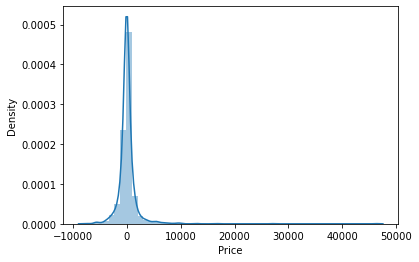

In [228]:
predict(BaggingRegressor())

XGBoost gives minimum RMSE values and can be considered to be better than the other models used.